In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#import dataset from sklearn 
from sklearn.datasets import load_digits


In [12]:
df=load_digits()
#df

In [15]:
print(df.data)
print(df.data.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)


In [17]:
print(df.target)
print(df.target.shape)

[0 1 2 ... 8 9 8]
(1797,)


In [19]:
df.images.shape

(1797, 8, 8)

In [21]:
dataimagelength=len(df.images)
dataimagelength

1797

VISUALIZE THE DATA


<Figure size 432x288 with 0 Axes>

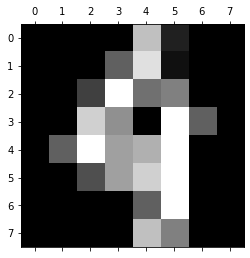

array([[ 0.,  0.,  0.,  0., 12.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 14.,  1.,  0.,  0.],
       [ 0.,  0.,  4., 16.,  7.,  8.,  0.,  0.],
       [ 0.,  0., 13.,  9.,  0., 16.,  6.,  0.],
       [ 0.,  6., 16., 10., 11., 16.,  0.,  0.],
       [ 0.,  0.,  5., 10., 13., 16.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  6., 16.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 12.,  8.,  0.,  0.]])

In [23]:
n=24 #n is the number of sample out of 1797
plt.gray()
plt.matshow(df.images[n])
plt.show()

df.images[n]

## SEGREGATING DATA

In [25]:
X=df.images.reshape((dataimagelength,-1))
print(X)
print(X.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)


In [28]:
y=df.target
print(y)
print(y.shape)

[0 1 2 ... 8 9 8]
(1797,)


## SPLITTING DATA INTO TRAIN VALIDATION AND TEST

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_valtest, y_train, y_valtest = train_test_split( X, y, test_size=0.3, random_state=101)

In [32]:
X_val, X_test, y_val, y_test = train_test_split( X_valtest, y_valtest, test_size=0.5, random_state=101)

In [34]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(1257, 64)
(270, 64)
(270, 64)
(1257,)
(270,)
(270,)


In [36]:
from sklearn.svm import SVC

In [52]:
linear_model=SVC(kernel='linear')
rbf_model=SVC(kernel='rbf')
model3=SVC(kernel='rbf',gamma=0.01)
model4=SVC(kernel='rbf',gamma=0.001)
model5=SVC(kernel='rbf',gamma=0.001,C=2)

In [53]:
linear_model.fit(X_train,y_train)
rbf_model.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)
model5.fit(X_train,y_train)

SVC(C=2, gamma=0.001)

In [54]:
pred_linear_model=linear_model.predict(X_val)
pred_rbf_model=rbf_model.predict(X_val)
pred_model3=model3.predict(X_val)
pred_model4=model4.predict(X_val)
pred_model5=model5.predict(X_val)

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
print(f"The accuracy of Linear_model is : {accuracy_score(pred_linear_model,y_val)*100}")
print(f"The accuracy of rbf_model is : {accuracy_score(pred_rbf_model,y_val)*100}")
print(f"The accuracy of model3 is : {accuracy_score(pred_model3,y_val)*100}")
print(f"The accuracy of model4 is : {accuracy_score(pred_model4,y_val)*100}")
print(f"The accuracy of model5 is : {accuracy_score(pred_model5,y_val)*100}")

The accuracy of Linear_model is : 98.14814814814815
The accuracy of rbf_model is : 99.25925925925925
The accuracy of model3 is : 77.77777777777779
The accuracy of model4 is : 99.25925925925925
The accuracy of model5 is : 99.62962962962963


Since Model5 is giving the best accuracy , so now we are going to set model 5 as our most optimized and final model and will check its accuracy on the unseen test data.

In [59]:
final_model=SVC(kernel='rbf',gamma=0.001,C=2)
final_model.fit(X_train,y_train)
pred=final_model.predict(X_test)
print(f"The accuracy of FINAL MODEL is :{accuracy_score(pred,y_test)*100}%")

The accuracy of FINAL MODEL is :98.51851851851852%


AFTER TRAINING OUR DATA ON TRAIN DATA , OPTIMIZING & TUNING PARAMETERS BASED ON VALIDATION DATA AND THEN FINALLY PREDICTING  ON TEST DATA AND OBTAINING  ACCURACY SCORE.

HENCE THE ACCURACY WHICH IS TO BE REPORTED TO THE CLIENT IS 98.51%.